# Sales Prediction For DOT Glasses

# 1. Clean the dataset :

# Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Reading the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\Lucky Computers\Downloads\advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Basic information about data - EDA

# Count Null and Non-Null Values:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Checking duplicate rows

In [6]:
data[data.duplicated()]

,TV,Radio,Newspaper,Sales


In [7]:
len(data[data.duplicated()])

0

# Statistical Summary

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Visualize the data using Boxplot

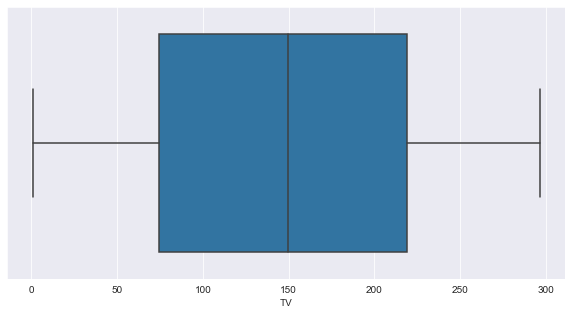

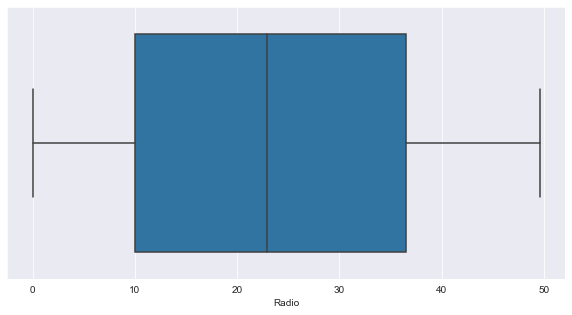

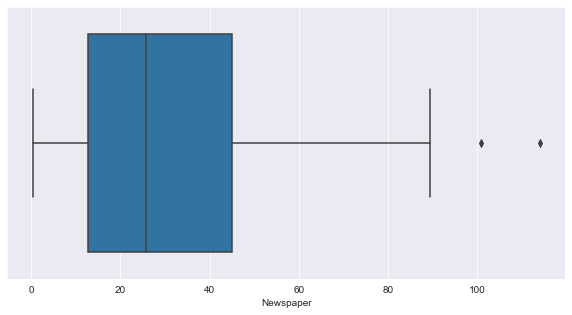

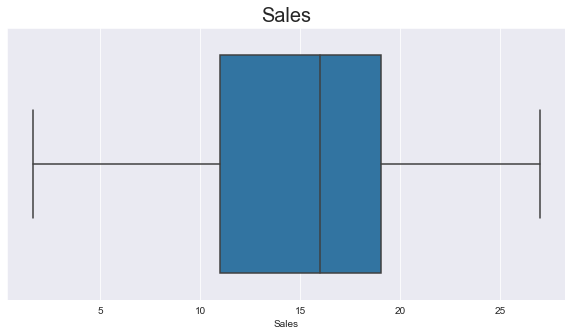

In [9]:
for c in ['TV', 'Radio', 'Newspaper', 'Sales']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[c])
  
plt.title(c, fontsize=20)
plt.show()

# As we see clearily on the bases of boxplot we have outliers exist only in Newspaper column

# checking outliers

In [10]:
dictn = {"TV" : "{:.1f}", "Radio" : "{:.1f}", "Newspaper" : "{:.1f}", "Sales" : "{:.1f}"}

In [11]:
def outliers(out, col):
    out_idx = out.index
    i = pd.IndexSlice[out_idx, col]
    return out.style.applymap(lambda x: "background-color: red", subset = i).format(dictn)

# checking outiers in Newspaper column

In [12]:
df_out= data.loc[data["Newspaper"] > 95].copy()
outliers(df_out, "Newspaper")

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [13]:
df_out= data.loc[data["Sales"] > 50].copy()
outliers(df_out, "Sales")

,TV,Radio,Newspaper,Sales


# filling outliers values with np.nan in Newspaper column

In [14]:
data.loc[data['Newspaper']>95 , 'Newspaper'] = np.NaN

# If i want to fill all NaN values with mean value of 'Newspaper'

In [15]:
data['Newspaper'].mean()

29.777272727272724

In [16]:
data.fillna(data['Newspaper'].mean())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# 2. Exploratory Data Analysis (EDA)

# Knows the datatypes

In [17]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Correlation Plot - EDA

# correlation

In [18]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.049771,0.901208
Radio,0.054809,1.000000,0.346364,0.349631
Newspaper,0.049771,0.346364,1.000000,0.151764
Sales,0.901208,0.349631,0.151764,1.000000


In [19]:
data.corr()['Sales']

TV           0.901208
Radio        0.349631
Newspaper    0.151764
Sales        1.000000
Name: Sales, dtype: float64

# Use Heatmap to see Correlation

Text(0.5, 1.0, 'Heatmap of the dataset')

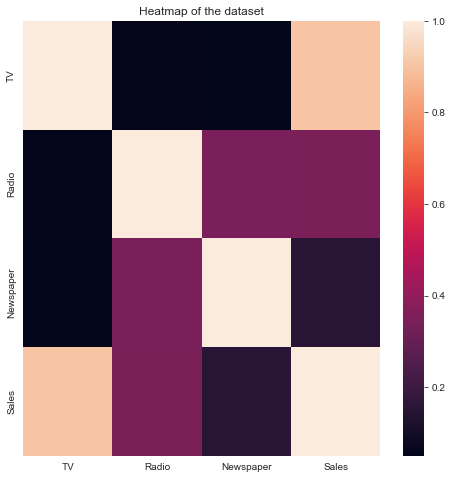

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())
plt.title("Heatmap of the dataset")

# Use Scatter plots to see how the target variable is related to each other

Text(0.5, 1.0, 'Relation between TV and Sales column')

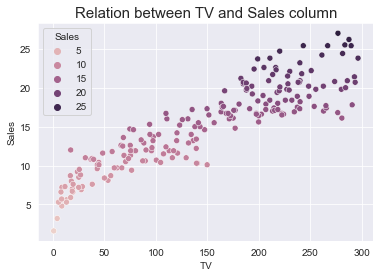

In [21]:
sns.scatterplot(x='TV',y='Sales',hue='Sales',data=data)
plt.title("Relation between TV and Sales column",fontsize=15)

Text(0.5, 1.0, 'Relation between Radio and Sales column')

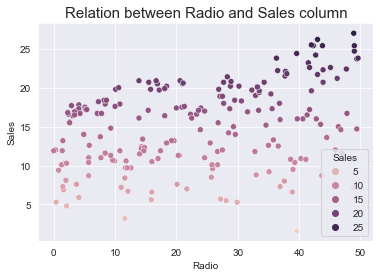

In [22]:
sns.scatterplot(x='Radio',y='Sales',hue='Sales',data=data)
plt.title("Relation between Radio and Sales column",fontsize=15)

Text(0.5, 1.0, 'Relation between Newspaper and Sales column')

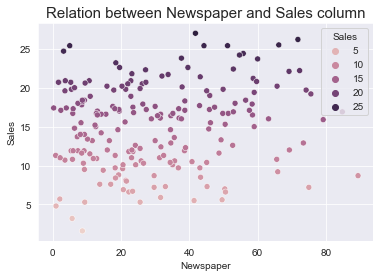

In [23]:
sns.scatterplot(x='Newspaper',y='Sales',hue='Sales',data=data)
plt.title("Relation between Newspaper and Sales column",fontsize=15)

# Use barplot to see the distribution of sales column with other columns :

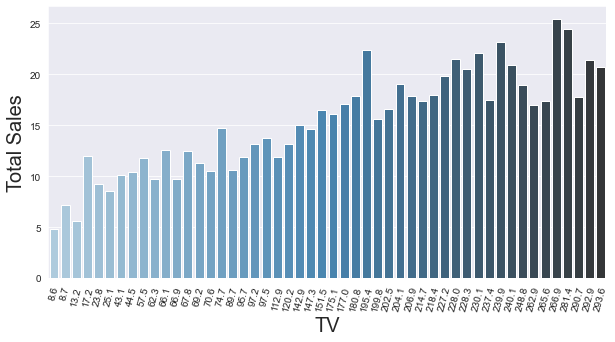

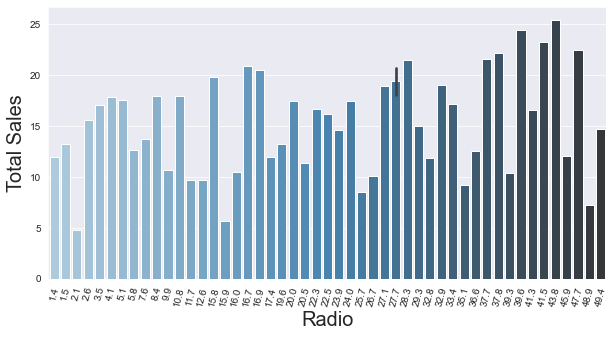

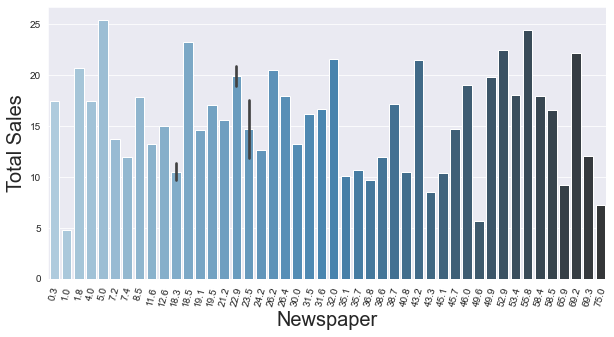

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(y="Sales", x="TV",palette="Blues_d", data=data.iloc[:50])
plt.xticks(rotation=75)
plt.xlabel("TV", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show();

plt.figure(figsize=(10,5))
sns.barplot(y="Sales", x="Radio",palette="Blues_d", data=data.iloc[:50])
plt.xticks(rotation=75)
plt.xlabel("Radio", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show();

plt.figure(figsize=(10,5))
sns.barplot(y="Sales", x="Newspaper",palette="Blues_d", data=data.iloc[:50])
plt.xticks(rotation=75)
plt.xlabel("Newspaper", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show();

# Use pointplot to compare sales distribution to other ;

<Figure size 1440x1440 with 0 Axes>

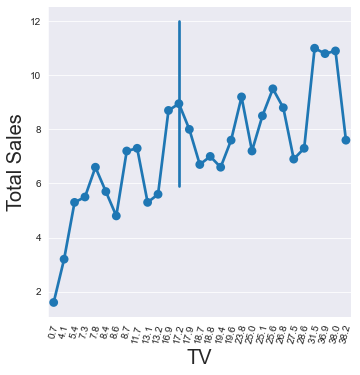

<Figure size 1440x1440 with 0 Axes>

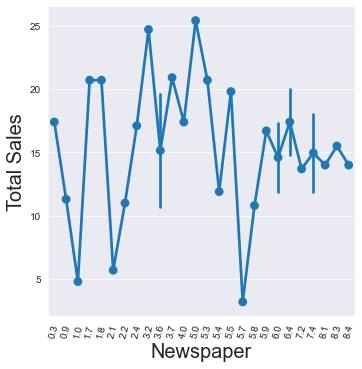

<Figure size 1440x1440 with 0 Axes>

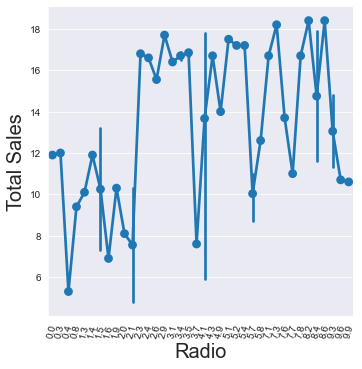

In [25]:
data2 = data.sort_values("TV")
plt.figure(figsize=(20,20))
sns.catplot(x='TV',y='Sales',data=data2.iloc[:30],kind='point')
plt.xticks(rotation=75)
plt.xlabel("TV", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()


data2 = data.sort_values("Newspaper")
plt.figure(figsize=(20,20))
sns.catplot(x='Newspaper',y='Sales',data=data2.iloc[:30],kind='point')
plt.xticks(rotation=75)
plt.xlabel("Newspaper", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()


data2 = data.sort_values("Radio")
plt.figure(figsize=(20,20))
sns.catplot(x='Radio',y='Sales',data=data2.iloc[:50],kind='point')
plt.xticks(rotation=75)
plt.xlabel("Radio", fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()

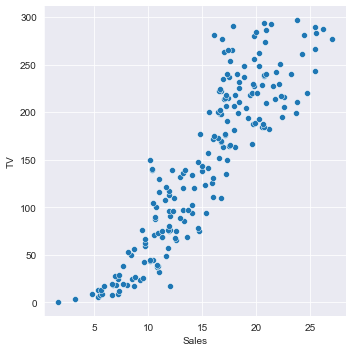

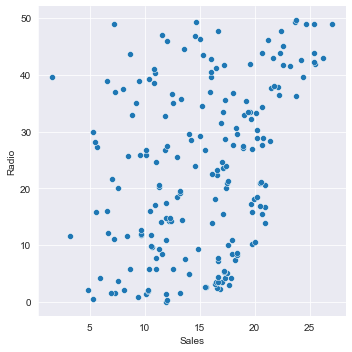

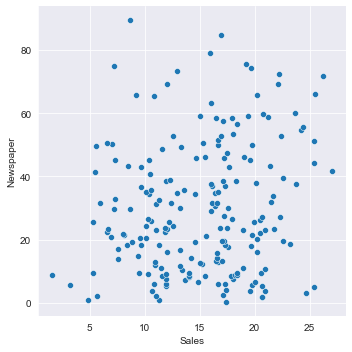

In [26]:
for c in data.columns:
    if(c=='Sales'):
        break
    data2 = data.sort_values(c)
    sns.relplot(x="Sales",y=c,data=data2)
plt.show()    

# -- As above Visualization we can clearly see the Sales column distribution with other columns